# Breast Cancer Diagnosis using Logistic Regression for Binary classification, Naiive Bayes Classifiers, and SMOTE

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, mean_squared_error, roc_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample

Download the WDBC data from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

In [14]:
headers = ["Patient ID", "Diagnosis"]
for i in range(1,31):
    headers.append(i)
df = pd.read_csv("wdbc.data", names=headers);
df

Patient ID Diagnosis      1      2       3       4        5        6  \
0        842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760   
1        842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864   
2      84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990   
3      84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390   
4      84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280   
..          ...       ...    ...    ...     ...     ...      ...      ...   
564      926424         M  21.56  22.39  142.00  1479.0  0.11100  0.11590   
565      926682         M  20.13  28.25  131.20  1261.0  0.09780  0.10340   
566      926954         M  16.60  28.08  108.30   858.1  0.08455  0.10230   
567      927241         M  20.60  29.33  140.10  1265.0  0.11780  0.27700   
568       92751         B   7.76  24.54   47.92   181.0  0.05263  0.04362   

           7        8  ...      21     22      23      24       25       26  \
0    0.30010  0.14710  ...  25.380  17.33  184.60  2019.0  0.16220  0.66560   
1    0.08690  0.07017  ...  24.990  23.41  158.80  1956.0  0.12380  0.18660   
2    0.19740  0.12790  ...  23.570  25.53  152.50  1709.0  0.14440  0.42450   
3    0.24140  0.10520  ...  14.910  26.50   98.87   567.7  0.20980  0.86630   
4    0.19800  0.10430  ...  22.540  16.67  152.20  1575.0  0.13740  0.20500   
..       ...      ...  ...     ...    ...     ...     ...      ...      ...   
564  0.24390  0.13890  ...  25.450  26.40  166.10  2027.0  0.14100  0.21130   
565  0.14400  0.09791  ...  23.690  38.25  155.00  1731.0  0.11660  0.19220   
566  0.09251  0.05302  ...  18.980  34.12  126.70  1124.0  0.11390  0.30940   
567  0.35140  0.15200  ...  25.740  39.42  184.60  1821.0  0.16500  0.86810   
568  0.00000  0.00000  ...   9.456  30.37   59.16   268.6  0.08996  0.06444   

         27      28      29       30  
0    0.7119  0.2654  0.4601  0.11890  
1    0.2416  0.1860  0.2750  0.08902  
2    0.4504  0.2430  0.3613  0.08758  
3    0.6869  0.2575  0.6638  0.17300  
4    0.4000  0.1625  0.2364  0.07678  
..      ...     ...     ...      ...  
564  0.4107  0.2216  0.2060  0.07115  
565  0.3215  0.1628  0.2572  0.06637  
566  0.3403  0.1418  0.2218  0.07820  
567  0.9387  0.2650  0.4087  0.12400  
568  0.0000  0.0000  0.2871  0.07039  

[569 rows x 32 columns]

train/test data split

In [42]:
malignant = df[df["Diagnosis"] == "M"]
benign = df[df["Diagnosis"] == "B"]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(malignant)):
    if(loc < 30):
        testingset = testingset.append(malignant.iloc[loc])
    else:
        trainingset = trainingset.append(malignant.iloc[loc])
    
for loc in range(len(benign)):
    if(loc < 50):
        testingset = testingset.append(benign.iloc[loc])
    else:
        trainingset = trainingset.append(benign.iloc[loc])

testingset

1      2       3       4        5        6        7        8  \
0    17.990  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710   
1    20.570  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
2    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
3    11.420  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
4    20.290  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
..      ...    ...     ...     ...      ...      ...      ...      ...   
113  10.510  20.19   68.64   334.2  0.11220  0.13030  0.06476  0.03068   
114   8.726  15.83   55.84   230.9  0.11500  0.08201  0.04132  0.01924   
115  11.930  21.53   76.53   438.6  0.09768  0.07849  0.03328  0.02008   
116   8.950  15.76   58.74   245.2  0.09462  0.12430  0.09263  0.02308   
120  11.410  10.82   73.34   403.3  0.09373  0.06685  0.03512  0.02623   

          9       10  ...      23      24      25      26      27       28  \
0    0.2419  0.07871  ...  184.60  2019.0  0.1622  0.6656  0.7119  0.26540   
1    0.1812  0.05667  ...  158.80  1956.0  0.1238  0.1866  0.2416  0.18600   
2    0.2069  0.05999  ...  152.50  1709.0  0.1444  0.4245  0.4504  0.24300   
3    0.2597  0.09744  ...   98.87   567.7  0.2098  0.8663  0.6869  0.25750   
4    0.1809  0.05883  ...  152.20  1575.0  0.1374  0.2050  0.4000  0.16250   
..      ...      ...  ...     ...     ...     ...     ...     ...      ...   
113  0.1922  0.07782  ...   72.62   374.4  0.1300  0.2049  0.1295  0.06136   
114  0.1649  0.07633  ...   64.48   284.4  0.1724  0.2364  0.2456  0.10500   
115  0.1688  0.06194  ...   87.54   583.0  0.1500  0.2399  0.1503  0.07247   
116  0.1305  0.07163  ...   63.34   270.0  0.1179  0.1879  0.1544  0.03846   
120  0.1667  0.06113  ...   83.74   510.5  0.1548  0.2390  0.2102  0.08958   

         29       30  Diagnosis  Patient ID  
0    0.4601  0.11890          M    842302.0  
1    0.2750  0.08902          M    842517.0  
2    0.3613  0.08758          M  84300903.0  
3    0.6638  0.17300          M  84348301.0  
4    0.2364  0.07678          M  84358402.0  
..      ...      ...        ...         ...  
113  0.2383  0.09026          B    864292.0  
114  0.2926  0.10170          B    864496.0  
115  0.2438  0.08541          B    864685.0  
116  0.1652  0.07722          B    864726.0  
120  0.3016  0.08523          B    865137.0  

[80 rows x 32 columns]

In [43]:
trainingset

1      2       3       4        5        6        7        8       9  \
33   19.27  26.47  127.90  1162.0  0.09401  0.17190  0.16570  0.07593  0.1853   
34   16.13  17.88  107.00   807.2  0.10400  0.15590  0.13540  0.07752  0.1998   
35   16.74  21.59  110.10   869.5  0.09610  0.13360  0.13480  0.06018  0.1896   
36   14.25  21.72   93.63   633.0  0.09823  0.10980  0.13190  0.05598  0.1885   
38   14.99  25.20   95.54   698.8  0.09387  0.05131  0.02398  0.02899  0.1565   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
558  14.59  22.68   96.39   657.1  0.08473  0.13300  0.10290  0.03736  0.1454   
559  11.51  23.93   74.52   403.5  0.09261  0.10210  0.11120  0.04105  0.1388   
560  14.05  27.15   91.38   600.4  0.09929  0.11260  0.04462  0.04304  0.1537   
561  11.20  29.37   70.67   386.0  0.07449  0.03558  0.00000  0.00000  0.1060   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          10  ...      23      24       25       26       27       28      29  \
33   0.06261  ...  161.40  1813.0  0.15090  0.65900  0.60910  0.17850  0.3672   
34   0.06515  ...  132.70  1261.0  0.14460  0.58040  0.52740  0.18640  0.4270   
35   0.05656  ...  133.50  1229.0  0.15630  0.38350  0.54090  0.18130  0.4863   
36   0.06125  ...  116.20   799.6  0.14460  0.42380  0.51860  0.14470  0.3591   
38   0.05504  ...   95.54   698.8  0.09387  0.05131  0.02398  0.02899  0.1565   
..       ...  ...     ...     ...      ...      ...      ...      ...     ...   
558  0.06147  ...  105.90   733.5  0.10260  0.31710  0.36620  0.11050  0.2258   
559  0.06570  ...   82.28   474.2  0.12980  0.25170  0.36300  0.09653  0.2112   
560  0.06171  ...  100.20   706.7  0.12410  0.22640  0.13260  0.10480  0.2250   
561  0.05502  ...   75.19   439.6  0.09267  0.05494  0.00000  0.00000  0.1566   
568  0.05884  ...   59.16   268.6  0.08996  0.06444  0.00000  0.00000  0.2871   

          30  Diagnosis  Patient ID  
33   0.11230          M    854002.0  
34   0.12330          M    854039.0  
35   0.08633          M    854253.0  
36   0.10140          M    854268.0  
38   0.05504          M    855133.0  
..       ...        ...         ...  
558  0.08004          B    925277.0  
559  0.08732          B    925291.0  
560  0.08321          B    925292.0  
561  0.05905          B    925311.0  
568  0.07039          B     92751.0  

[489 rows x 32 columns]

# Binary Classification Using Logistic Regression

Scatter plot matrix

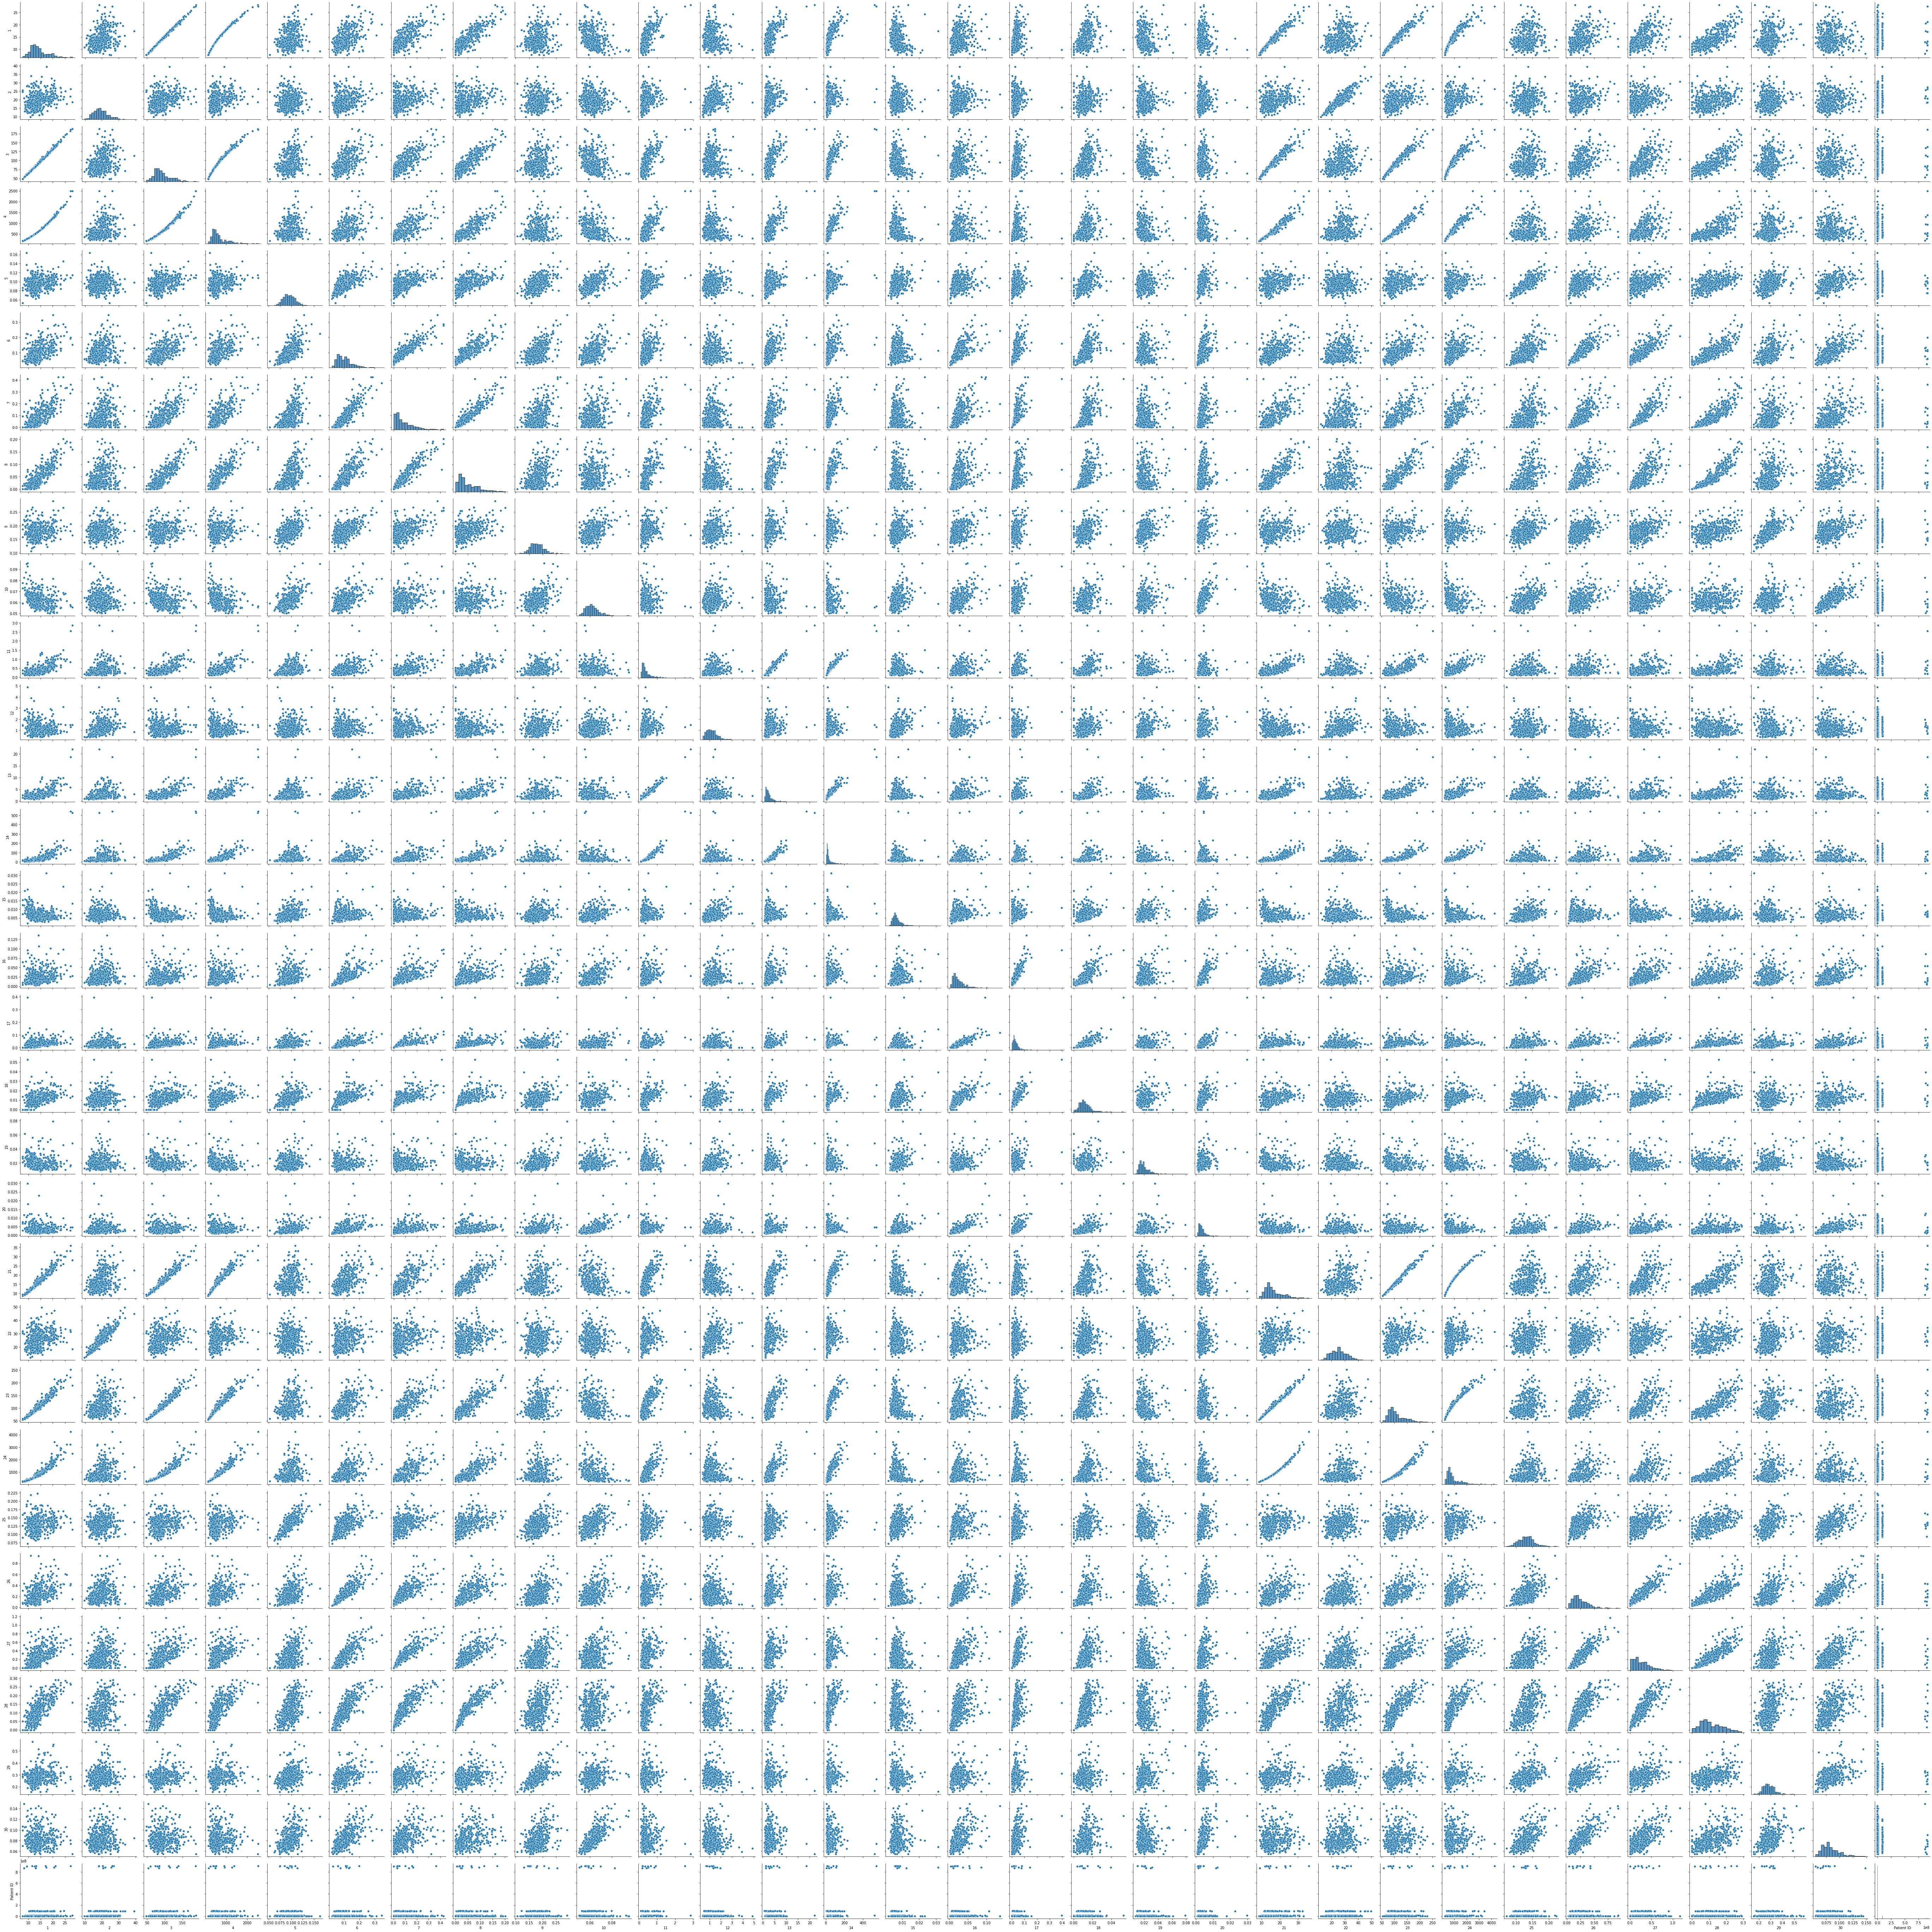

In [44]:
sns.pairplot(trainingset)

# Use logistic regression to solve the binary classification problem. 

In [45]:
x_train = trainingset.iloc[:, :30]
y_train = trainingset["Diagnosis"]

x_test = testingset.iloc[:, :30]
y_test = testingset["Diagnosis"]

In [54]:
LR = LogisticRegression(max_iter=4000).fit(x_train, y_train)
x_train_pred = LR.predict(x_train)
x_test_pred = LR.predict(x_test)

Train set confusion matrix
[[298   9]
 [ 14 168]]
Test set confusion matrix
[[50  0]
 [ 1 29]]


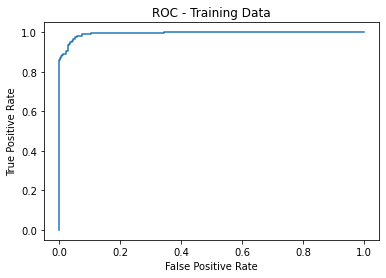

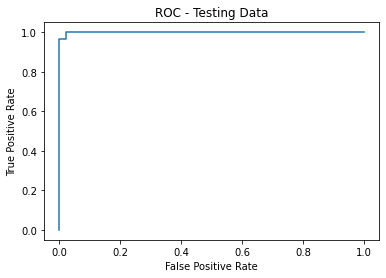

Training Data Precision: [0.95512821 0.94915254]
Training Data Recall: [0.97068404 0.92307692]
Training Data F1-score: [0.9628433  0.93593315]
Testing Data Precision: [0.98039216 1.        ]
Testing Data Recall: [1.         0.96666667]
Testing Data F1-score: [0.99009901 0.98305085]
Training Data AUC: 0.9935211368436125
Testing Data AUC: 0.9993333333333333


In [83]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = LR.predict_proba(x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label="M")
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = LR.predict_proba(x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label="M")
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# Calculate the p-values for your logistic regression parameters and prune those variables that are not statistically significant. 

In [98]:
chi2stat, pvalue = chi2(x_test, y_test)
dropvars = []
for i in range(len(pvalue)):
    if(pvalue[i] > 0.05):
        dropvars.append(i+1)
for i in dropvars:
    print("Variable " + str(i) + " is not statistically significant")
#pruning variables
pruned_x_train = x_train.drop(labels=dropvars, axis = 1)
pruned_x_test = x_test.drop(labels=dropvars, axis = 1)

LR = LogisticRegression(max_iter=4000).fit(pruned_x_train, y_train)
x_train_pred = LR.predict(pruned_x_train)
x_test_pred = LR.predict(pruned_x_test) 

Variable 5 is not statistically significant
Variable 6 is not statistically significant
Variable 7 is not statistically significant
Variable 8 is not statistically significant
Variable 9 is not statistically significant
Variable 10 is not statistically significant
Variable 11 is not statistically significant
Variable 12 is not statistically significant
Variable 15 is not statistically significant
Variable 16 is not statistically significant
Variable 17 is not statistically significant
Variable 18 is not statistically significant
Variable 19 is not statistically significant
Variable 20 is not statistically significant
Variable 25 is not statistically significant
Variable 28 is not statistically significant
Variable 29 is not statistically significant
Variable 30 is not statistically significant


Train set confusion matrix
[[297  10]
 [ 14 168]]
Test set confusion matrix
[[49  1]
 [ 2 28]]


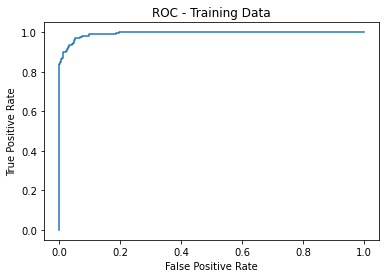

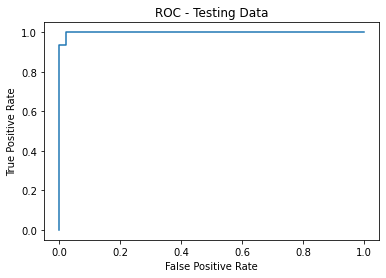

Training Data Precision: [0.95498392 0.94382022]
Training Data Recall: [0.96742671 0.92307692]
Training Data F1-score: [0.96116505 0.93333333]
Testing Data Precision: [0.96078431 0.96551724]
Testing Data Recall: [0.98       0.93333333]
Testing Data F1-score: [0.97029703 0.94915254]
Training Data AUC: 0.9931989834269965
Testing Data AUC: 0.9986666666666667


In [100]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = LR.predict_proba(pruned_x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label="M")
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = LR.predict_proba(pruned_x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label="M")
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

These classes seem to be well-separated to cause instability in calculating logistic regression parameters. This is known since python warns of regression values have not converged.

Download the WPBC data from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

In [105]:
headers = ["Patient ID", "Recurrence", "Time-to-recurrence"]
for i in range(1,31):
    headers.append(i)
headers.append("diameter")
headers.append("num_pos_lymph_nodes")
df = pd.read_csv("wpbc.data", names=headers);
df

Patient ID Recurrence  Time-to-recurrence      1      2       3       4  \
0        119513          N                  31  18.02  27.60  117.50  1013.0   
1          8423          N                  61  17.99  10.38  122.80  1001.0   
2        842517          N                 116  21.37  17.44  137.50  1373.0   
3        843483          N                 123  11.42  20.38   77.58   386.1   
4        843584          R                  27  20.29  14.34  135.10  1297.0   
..          ...        ...                 ...    ...    ...     ...     ...   
193      942640          N                  10  22.52  21.92  146.90  1597.0   
194      943471          N                   8  15.44  31.18  101.00   740.4   
195       94547          N                  12  17.17  29.19  110.00   915.3   
196      947204          R                   3  21.42  22.84  145.00  1440.0   
197      947489          N                   6  16.70  28.13  110.30   885.4   

           5        6        7  ...      23      24       25      26      27  \
0    0.09489  0.10360  0.10860  ...  139.70  1436.0  0.11950  0.1926  0.3140   
1    0.11840  0.27760  0.30010  ...  184.60  2019.0  0.16220  0.6656  0.7119   
2    0.08836  0.11890  0.12550  ...  159.10  1949.0  0.11880  0.3449  0.3414   
3    0.14250  0.28390  0.24140  ...   98.87   567.7  0.20980  0.8663  0.6869   
4    0.10030  0.13280  0.19800  ...  152.20  1575.0  0.13740  0.2050  0.4000   
..       ...      ...      ...  ...     ...     ...      ...     ...     ...   
193  0.07592  0.09162  0.06862  ...  162.10  1902.0  0.08191  0.1319  0.1056   
194  0.09399  0.10620  0.13750  ...  112.60   929.0  0.12720  0.2362  0.2975   
195  0.08952  0.06655  0.06583  ...  132.50  1295.0  0.12610  0.1572  0.2141   
196  0.10700  0.19390  0.23800  ...  198.30  2375.0  0.14980  0.4379  0.5411   
197  0.08896  0.11310  0.10120  ...  128.80  1213.0  0.13300  0.2808  0.3455   

          28      29       30  diameter  num_pos_lymph_nodes  
0    0.11700  0.2677  0.08113       5.0                    5  
1    0.26540  0.4601  0.11890       3.0                    2  
2    0.20320  0.4334  0.09067       2.5                    0  
3    0.25750  0.6638  0.17300       2.0                    0  
4    0.16250  0.2364  0.07678       3.5                    0  
..       ...     ...      ...       ...                  ...  
193  0.09378  0.2061  0.05788       6.0                    2  
194  0.12860  0.2914  0.08024       1.5                    0  
195  0.09520  0.3362  0.06033       3.7                    0  
196  0.22150  0.2832  0.08981       3.0                    ?  
197  0.13170  0.3035  0.08036       3.5                    0  

[198 rows x 35 columns]

Train/test data split

In [125]:
non_recurrent = df[df["Recurrence"] == "N"]
recurrent = df[df["Recurrence"] == "R"]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(non_recurrent)):
    if(loc < 130):
        trainingset = trainingset.append(non_recurrent.iloc[loc])
    else:
        testingset = testingset.append(non_recurrent.iloc[loc])
    
for loc in range(len(recurrent)):
    if(loc < 37):
        trainingset = trainingset.append(recurrent.iloc[loc])
    else:
        testingset = testingset.append(recurrent.iloc[loc])

        
trainingset = trainingset.append(df.iloc[197])
testingset = testingset.drop(index = 197)

trainingset

1      2       3       4        5        6       7        8       9  \
0    18.02  27.60  117.50  1013.0  0.09489  0.10360  0.1086  0.07055  0.1865   
1    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
2    21.37  17.44  137.50  1373.0  0.08836  0.11890  0.1255  0.08180  0.2333   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
6    18.98  19.61  124.40  1112.0  0.09087  0.12370  0.1213  0.08910  0.1727   
..     ...    ...     ...     ...      ...      ...     ...      ...     ...   
132  15.08  25.74   98.00   716.6  0.10240  0.09769  0.1235  0.06553  0.1647   
135  22.01  21.90  147.20  1482.0  0.10630  0.19540  0.2448  0.15010  0.1824   
143  15.50  21.08  102.90   803.1  0.11200  0.15710  0.1522  0.08481  0.2085   
145  20.18  19.54  133.80  1250.0  0.11330  0.14890  0.2133  0.12590  0.1724   
197  16.70  28.13  110.30   885.4  0.08896  0.11310  0.1012  0.04989  0.1890   

          10  ...      26      27      28      29       30  Patient ID  \
0    0.06333  ...  0.1926  0.3140  0.1170  0.2677  0.08113    119513.0   
1    0.07871  ...  0.6656  0.7119  0.2654  0.4601  0.11890      8423.0   
2    0.06010  ...  0.3449  0.3414  0.2032  0.4334  0.09067    842517.0   
3    0.09744  ...  0.8663  0.6869  0.2575  0.6638  0.17300    843483.0   
6    0.05767  ...  0.3371  0.2990  0.1922  0.2726  0.09581    844359.0   
..       ...  ...     ...     ...     ...     ...      ...         ...   
132  0.06464  ...  0.2356  0.4029  0.1526  0.2654  0.09438   9010018.0   
135  0.06140  ...  0.3885  0.4756  0.2432  0.2741  0.08574   9012000.0   
143  0.06864  ...  0.4002  0.4211  0.2134  0.3003  0.10480    906023.0   
145  0.06053  ...  0.2942  0.5308  0.2173  0.3032  0.08075    908194.0   
197  0.06035  ...  0.2808  0.3455  0.1317  0.3035  0.08036    947489.0   

     Recurrence  Time-to-recurrence  diameter  num_pos_lymph_nodes  
0             N                31.0       5.0                    5  
1             N                61.0       3.0                    2  
2             N               116.0       2.5                    0  
3             N               123.0       2.0                    0  
6             N                60.0       1.5                    ?  
..          ...                 ...       ...                  ...  
132           R                 5.0       2.6                    0  
135           R                 2.0       3.0                    1  
143           R                49.0       0.4                    0  
145           R                 1.0       4.5                   27  
197           N                 6.0       3.5                    0  

[168 rows x 35 columns]

In [126]:
testingset

1      2       3       4        5        6        7        8       9  \
174  18.11  26.17  118.70   970.2  0.09867  0.17160  0.21770  0.09718  0.2063   
175  21.93  30.64  146.70  1487.0  0.08679  0.17230  0.20530  0.10100  0.1796   
178  24.29  25.48  161.80  1715.0  0.09374  0.22840  0.27020  0.13690  0.2307   
179  15.60  26.79   99.85   760.0  0.07885  0.05240  0.03778  0.02876  0.1580   
180  15.78  17.10  102.20   769.0  0.09668  0.09030  0.07268  0.04475  0.1890   
181  19.28  20.88  124.90  1127.0  0.09033  0.11970  0.06435  0.08870  0.1971   
182  15.66  24.51  102.00   771.1  0.08886  0.08731  0.09483  0.04286  0.1995   
183  22.44  27.42  150.60  1504.0  0.12110  0.20820  0.35790  0.18420  0.2524   
184  17.98  23.96  120.00   995.0  0.11570  0.17390  0.19540  0.12190  0.1981   
185  13.63  24.70   89.65   569.2  0.10550  0.13120  0.11610  0.06403  0.1791   
186  23.01  33.87  156.80  1705.0  0.11570  0.19480  0.29790  0.15220  0.1799   
187  22.41  29.95  145.50  1528.0  0.11190  0.16990  0.30760  0.15940  0.2099   
188  12.53  30.98   80.41   490.9  0.09252  0.06271  0.06151  0.03938  0.1993   
189  19.80  20.46  130.20  1235.0  0.09652  0.10770  0.15990  0.08705  0.1620   
190  19.96  27.41  130.80  1238.0  0.09075  0.11670  0.13550  0.08397  0.1600   
191  19.22  27.18  128.80  1134.0  0.10900  0.17770  0.21380  0.11160  0.1924   
192  14.72  25.26   99.28   657.5  0.11740  0.21120  0.17290  0.09465  0.2079   
193  22.52  21.92  146.90  1597.0  0.07592  0.09162  0.06862  0.06367  0.1728   
194  15.44  31.18  101.00   740.4  0.09399  0.10620  0.13750  0.06500  0.1735   
195  17.17  29.19  110.00   915.3  0.08952  0.06655  0.06583  0.05068  0.1793   
147  13.98  19.62   91.12   599.5  0.10600  0.11330  0.11260  0.06463  0.1669   
150  17.75  28.03  117.30   981.6  0.09997  0.13140  0.16980  0.08293  0.1713   
152  19.59  25.00  127.70  1191.0  0.10320  0.09871  0.16550  0.09063  0.1663   
155  19.44  18.82  128.10  1167.0  0.10890  0.14480  0.22560  0.11940  0.1823   
157  18.01  20.56  118.40  1007.0  0.10010  0.12890  0.11700  0.07762  0.2116   
159  20.59  21.24  137.80  1320.0  0.10850  0.16440  0.21880  0.11210  0.1848   
161  24.24  18.74  159.60  1945.0  0.08938  0.11360  0.17270  0.10710  0.1591   
176  17.53  25.28  114.00   966.6  0.09278  0.09175  0.11050  0.06741  0.1424   
177  18.11  30.99  115.80   984.4  0.08625  0.09240  0.06214  0.05598  0.1603   
196  21.42  22.84  145.00  1440.0  0.10700  0.19390  0.23800  0.13180  0.1884   

          10  ...       26       27       28      29       30  Patient ID  \
174  0.06194  ...  0.51270  0.87740  0.26030  0.3941  0.09318    927997.0   
175  0.05715  ...  0.40720  0.44940  0.18860  0.2784  0.07353    928594.0   
178  0.06308  ...  0.39350  0.61180  0.20630  0.3983  0.07978    931678.0   
179  0.05395  ...  0.09745  0.12630  0.08222  0.2805  0.06378    935058.0   
180  0.05690  ...  0.26400  0.29010  0.12340  0.3261  0.07752    935878.0   
181  0.05417  ...  0.12590  0.08201  0.11160  0.2147  0.05644    937100.0   
182  0.05626  ...  0.24860  0.35080  0.12730  0.2964  0.06591    937653.0   
183  0.05848  ...  0.25800  0.47410  0.21350  0.2809  0.06318    937654.0   
184  0.06306  ...  0.26060  0.31240  0.17530  0.2746  0.07830    937664.0   
185  0.07058  ...  0.35150  0.34090  0.16890  0.2739  0.09945    937897.0   
186  0.06340  ...  0.28950  0.49370  0.21100  0.2774  0.07542    938225.0   
187  0.06803  ...  0.38320  0.58420  0.24220  0.2729  0.09391    938412.0   
188  0.06554  ...  0.13580  0.24360  0.12590  0.3292  0.09406    938413.0   
189  0.05731  ...  0.23680  0.39310  0.18400  0.2382  0.06831    939095.0   
190  0.05461  ...  0.25130  0.41060  0.16380  0.2245  0.07842    939426.0   
191  0.06389  ...  0.51300  0.68410  0.20990  0.3484  0.09774   9411286.0   
192  0.07496  ...  0.53520  0.56550  0.19740  0.3778  0.11320   9411300.0   
193  0.05262  ...  0.13190  0.10560  0.09378  0.2061  0.05788    942640.0   
194  0.06105  ...  0.23620  0.2975

# Preprocessing

In [145]:
data = trainingset[trainingset["num_pos_lymph_nodes"] != "?"]
median = data["num_pos_lymph_nodes"].median()
trainingset = trainingset.replace("?", median)
testingset = testingset.replace("?", median)

# Binary Classification Using Na ̈ıve Bayes’ Classifiers

Use Gaussian class conditional distributions.

In [146]:
y_train = trainingset["Recurrence"]
x_train = trainingset.drop(columns = "Recurrence")
x_train = x_train.drop(columns = "Patient ID")
x_train = x_train.drop(columns = "Time-to-recurrence")
x_train

1      2       3       4        5        6       7        8       9  \
0    18.02  27.60  117.50  1013.0  0.09489  0.10360  0.1086  0.07055  0.1865   
1    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
2    21.37  17.44  137.50  1373.0  0.08836  0.11890  0.1255  0.08180  0.2333   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
6    18.98  19.61  124.40  1112.0  0.09087  0.12370  0.1213  0.08910  0.1727   
..     ...    ...     ...     ...      ...      ...     ...      ...     ...   
132  15.08  25.74   98.00   716.6  0.10240  0.09769  0.1235  0.06553  0.1647   
135  22.01  21.90  147.20  1482.0  0.10630  0.19540  0.2448  0.15010  0.1824   
143  15.50  21.08  102.90   803.1  0.11200  0.15710  0.1522  0.08481  0.2085   
145  20.18  19.54  133.80  1250.0  0.11330  0.14890  0.2133  0.12590  0.1724   
197  16.70  28.13  110.30   885.4  0.08896  0.11310  0.1012  0.04989  0.1890   

          10  ...      23      24      25      26      27      28      29  \
0    0.06333  ...  139.70  1436.0  0.1195  0.1926  0.3140  0.1170  0.2677   
1    0.07871  ...  184.60  2019.0  0.1622  0.6656  0.7119  0.2654  0.4601   
2    0.06010  ...  159.10  1949.0  0.1188  0.3449  0.3414  0.2032  0.4334   
3    0.09744  ...   98.87   567.7  0.2098  0.8663  0.6869  0.2575  0.6638   
6    0.05767  ...  152.60  1593.0  0.1144  0.3371  0.2990  0.1922  0.2726   
..       ...  ...     ...     ...     ...     ...     ...     ...     ...   
132  0.06464  ...  121.20  1050.0  0.1660  0.2356  0.4029  0.1526  0.2654   
135  0.06140  ...  195.00  2227.0  0.1294  0.3885  0.4756  0.2432  0.2741   
143  0.06864  ...  157.10  1748.0  0.1517  0.4002  0.4211  0.2134  0.3003   
145  0.06053  ...  146.00  1479.0  0.1665  0.2942  0.5308  0.2173  0.3032   
197  0.06035  ...  128.80  1213.0  0.1330  0.2808  0.3455  0.1317  0.3035   

          30  diameter  num_pos_lymph_nodes  
0    0.08113       5.0                    5  
1    0.11890       3.0                    2  
2    0.09067       2.5                    0  
3    0.17300       2.0                    0  
6    0.09581       1.5                  1.0  
..       ...       ...                  ...  
132  0.09438       2.6                    0  
135  0.08574       3.0                    1  
143  0.10480       0.4                    0  
145  0.08075       4.5                   27  
197  0.08036       3.5                    0  

[168 rows x 32 columns]

In [148]:
y_test = testingset["Recurrence"]
x_test = testingset.drop(columns = "Recurrence")
x_test = x_test.drop(columns = "Patient ID")
x_test = x_test.drop(columns = "Time-to-recurrence")
x_test

1      2       3       4        5        6        7        8       9  \
174  18.11  26.17  118.70   970.2  0.09867  0.17160  0.21770  0.09718  0.2063   
175  21.93  30.64  146.70  1487.0  0.08679  0.17230  0.20530  0.10100  0.1796   
178  24.29  25.48  161.80  1715.0  0.09374  0.22840  0.27020  0.13690  0.2307   
179  15.60  26.79   99.85   760.0  0.07885  0.05240  0.03778  0.02876  0.1580   
180  15.78  17.10  102.20   769.0  0.09668  0.09030  0.07268  0.04475  0.1890   
181  19.28  20.88  124.90  1127.0  0.09033  0.11970  0.06435  0.08870  0.1971   
182  15.66  24.51  102.00   771.1  0.08886  0.08731  0.09483  0.04286  0.1995   
183  22.44  27.42  150.60  1504.0  0.12110  0.20820  0.35790  0.18420  0.2524   
184  17.98  23.96  120.00   995.0  0.11570  0.17390  0.19540  0.12190  0.1981   
185  13.63  24.70   89.65   569.2  0.10550  0.13120  0.11610  0.06403  0.1791   
186  23.01  33.87  156.80  1705.0  0.11570  0.19480  0.29790  0.15220  0.1799   
187  22.41  29.95  145.50  1528.0  0.11190  0.16990  0.30760  0.15940  0.2099   
188  12.53  30.98   80.41   490.9  0.09252  0.06271  0.06151  0.03938  0.1993   
189  19.80  20.46  130.20  1235.0  0.09652  0.10770  0.15990  0.08705  0.1620   
190  19.96  27.41  130.80  1238.0  0.09075  0.11670  0.13550  0.08397  0.1600   
191  19.22  27.18  128.80  1134.0  0.10900  0.17770  0.21380  0.11160  0.1924   
192  14.72  25.26   99.28   657.5  0.11740  0.21120  0.17290  0.09465  0.2079   
193  22.52  21.92  146.90  1597.0  0.07592  0.09162  0.06862  0.06367  0.1728   
194  15.44  31.18  101.00   740.4  0.09399  0.10620  0.13750  0.06500  0.1735   
195  17.17  29.19  110.00   915.3  0.08952  0.06655  0.06583  0.05068  0.1793   
147  13.98  19.62   91.12   599.5  0.10600  0.11330  0.11260  0.06463  0.1669   
150  17.75  28.03  117.30   981.6  0.09997  0.13140  0.16980  0.08293  0.1713   
152  19.59  25.00  127.70  1191.0  0.10320  0.09871  0.16550  0.09063  0.1663   
155  19.44  18.82  128.10  1167.0  0.10890  0.14480  0.22560  0.11940  0.1823   
157  18.01  20.56  118.40  1007.0  0.10010  0.12890  0.11700  0.07762  0.2116   
159  20.59  21.24  137.80  1320.0  0.10850  0.16440  0.21880  0.11210  0.1848   
161  24.24  18.74  159.60  1945.0  0.08938  0.11360  0.17270  0.10710  0.1591   
176  17.53  25.28  114.00   966.6  0.09278  0.09175  0.11050  0.06741  0.1424   
177  18.11  30.99  115.80   984.4  0.08625  0.09240  0.06214  0.05598  0.1603   
196  21.42  22.84  145.00  1440.0  0.10700  0.19390  0.23800  0.13180  0.1884   

          10  ...      23      24       25       26       27       28      29  \
174  0.06194  ...  145.10  1251.0  0.14640  0.51270  0.87740  0.26030  0.3941   
175  0.05715  ...  171.50  1951.0  0.11680  0.40720  0.44940  0.18860  0.2784   
178  0.06308  ...  184.80  2213.0  0.12470  0.39350  0.61180  0.20630  0.3983   
179  0.05395  ...  117.20  1027.0  0.10970  0.09745  0.12630  0.08222  0.2805   
180  0.05690  ...  111.70   921.4  0.13860  0.26400  0.29010  0.12340  0.3261   
181  0.05417  ...  130.00  1214.0  0.09273  0.12590  0.08201  0.11160  0.2147   
182  0.05626  ...  124.00  1066.0  0.11820  0.24860  0.35080  0.12730  0.2964   
183  0.05848  ...  161.20  1689.0  0.13300  0.25800  0.47410  0.21350  0.2809   
184  0.06306  ...  135.20  1225.0  0.13400  0.26060  0.31240  0.17530  0.2746   
185  0.07058  ...  107.70   712.2  0.15540  0.35150  0.34090  0.16890  0.2739   
186  0.06340  ...  197.80  2481.0  0.14320  0.28950  0.49370  0.21100  0.2774   
187  0.06803  ...  194.50  2690.0  0.12510  0.38320  0.58420  0.24220  0.2729   
188  0.06554  ...   96.75   694.6  0.15600  0.13580  0.24360  0.12590  0.3292   
189  0.05731  ...  155.10  1623.0  0.13730  0.23680  0.39310  0.18400  0.2382   
190  0.05461  ...  150.30  1603.0  0.12930  0.25130  0.41060  0.16380  0.2245   
191  0.06389  ...  161.00  1565.0  0.15010  0.51300  0.68410  0.20990  0.3484   
192  0.07496  ...  111.60   814.8  0.14640  0.53520  0.56550  0.19740  0.3778   
193  0.05262  ...  162.10  1902.0  0.08

In [150]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

model = GaussianNB().fit(x_train, y_train)
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test) 

Train set confusion matrix
[[99 32]
 [19 18]]
Test set confusion matrix
[[13  7]
 [ 6  4]]


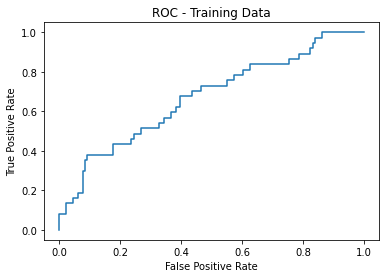

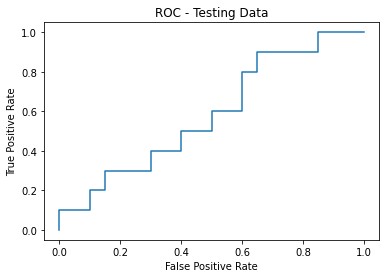

Training Data Precision: [0.83898305 0.36      ]
Training Data Recall: [0.75572519 0.48648649]
Training Data F1-score: [0.79518072 0.4137931 ]
Testing Data Precision: [0.68421053 0.36363636]
Testing Data Recall: [0.65 0.4 ]
Testing Data F1-score: [0.66666667 0.38095238]
Training Data AUC: 0.6707241592737776
Testing Data AUC: 0.585


In [153]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = model.predict_proba(x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = model.predict_proba(x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# Balance dataset using SMOTE

In [180]:
non_recurrent = df[df["Recurrence"] == "N"]
recurrent = df[df["Recurrence"] == "R"]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(non_recurrent)):
    if(loc < 130):
        trainingset = trainingset.append(non_recurrent.iloc[loc])
    else:
        testingset = testingset.append(non_recurrent.iloc[loc])
    
for loc in range(len(recurrent)):
    if(loc < 37):
        trainingset = trainingset.append(recurrent.iloc[loc])
    else:
        testingset = testingset.append(recurrent.iloc[loc])

        
trainingset = trainingset.append(df.iloc[197])
testingset = testingset.drop(index = 197)

data = trainingset[trainingset["num_pos_lymph_nodes"] != "?"]
median = data["num_pos_lymph_nodes"].median()
trainingset = trainingset.replace("?", median)
testingset = testingset.replace("?", median)

trainingset_N=trainingset[trainingset["Recurrence"]=="N"]
trainingset_R=trainingset[trainingset["Recurrence"]=="R"]

In [181]:
trainingset_N = resample(trainingset_N, replace = True, n_samples = 90, random_state=42)
trainingset_R = resample(trainingset_R, replace=True, n_samples=90, random_state=42)

In [182]:
#recombinindg the trainingset
trainingset = trainingset_R.append(trainingset_N)

y_train = trainingset["Recurrence"]
x_train = trainingset.drop(columns = "Recurrence")
x_train = x_train.drop(columns = "Patient ID")
x_train = x_train.drop(columns = "Time-to-recurrence")

In [183]:
y_test = testingset["Recurrence"]
x_test = testingset.drop(columns = "Recurrence")
x_test = x_test.drop(columns = "Patient ID")
x_test = x_test.drop(columns = "Time-to-recurrence")

In [184]:
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

model = GaussianNB().fit(x_train, y_train)
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test) 

Train set confusion matrix
[[67 23]
 [32 58]]
Test set confusion matrix
[[ 9 11]
 [ 6  4]]


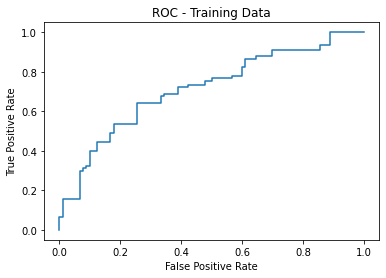

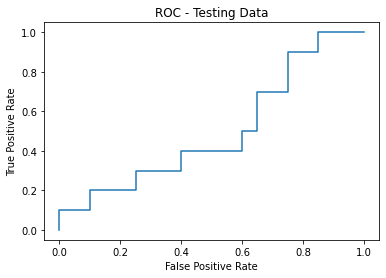

Training Data Precision: [0.67676768 0.71604938]
Training Data Recall: [0.74444444 0.64444444]
Training Data F1-score: [0.70899471 0.67836257]
Testing Data Precision: [0.6        0.26666667]
Testing Data Recall: [0.45 0.4 ]
Testing Data F1-score: [0.51428571 0.32      ]
Training Data AUC: 0.7129629629629629
Testing Data AUC: 0.5


In [185]:
#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = model.predict_proba(x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = model.predict_proba(x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

In this case, it does not seem like SMOTE helped, since the numbers are generally lower, we yielded an almost worst score in every attribute. 

# Repeat using multinomial priors

Using Naive Bayes Classifier

In [201]:
non_recurrent = df[df["Recurrence"] == "N"]
recurrent = df[df["Recurrence"] == "R"]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(non_recurrent)):
    if(loc < 130):
        trainingset = trainingset.append(non_recurrent.iloc[loc])
    else:
        testingset = testingset.append(non_recurrent.iloc[loc])
    
for loc in range(len(recurrent)):
    if(loc < 37):
        trainingset = trainingset.append(recurrent.iloc[loc])
    else:
        testingset = testingset.append(recurrent.iloc[loc])
        
trainingset = trainingset.append(df.iloc[197])
testingset = testingset.drop(index = 197)
        
data = trainingset[trainingset["num_pos_lymph_nodes"] != "?"]
median = data["num_pos_lymph_nodes"].median()
trainingset = trainingset.replace("?", median)
testingset = testingset.replace("?", median)

Train set confusion matrix
[[99 32]
 [22 15]]
Test set confusion matrix
[[15  5]
 [ 6  4]]


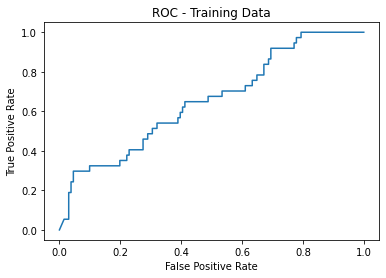

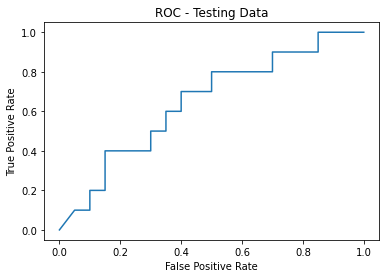

Training Data Precision: [0.81818182 0.31914894]
Training Data Recall: [0.75572519 0.40540541]
Training Data F1-score: [0.78571429 0.35714286]
Testing Data Precision: [0.71428571 0.44444444]
Testing Data Recall: [0.75 0.4 ]
Testing Data F1-score: [0.73170732 0.42105263]
Training Data AUC: 0.653187538683722
Testing Data AUC: 0.6475


In [202]:
y_train = trainingset["Recurrence"]
x_train = trainingset.drop(columns = "Recurrence")
x_train = x_train.drop(columns = "Patient ID")
x_train = x_train.drop(columns = "Time-to-recurrence")

y_test = testingset["Recurrence"]
x_test = testingset.drop(columns = "Recurrence")
x_test = x_test.drop(columns = "Patient ID")
x_test = x_test.drop(columns = "Time-to-recurrence")

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

model = MultinomialNB().fit(x_train, y_train)
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test) 

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = model.predict_proba(x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = model.predict_proba(x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

# SMOTE

Train set confusion matrix
[[65 25]
 [39 51]]
Test set confusion matrix
[[13  7]
 [ 5  5]]


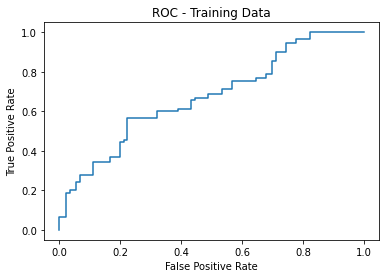

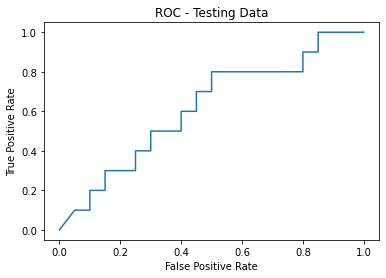

Training Data Precision: [0.625      0.67105263]
Training Data Recall: [0.72222222 0.56666667]
Training Data F1-score: [0.67010309 0.61445783]
Testing Data Precision: [0.72222222 0.41666667]
Testing Data Recall: [0.65 0.5 ]
Testing Data F1-score: [0.68421053 0.45454545]
Training Data AUC: 0.6730864197530865
Testing Data AUC: 0.6175


In [203]:
non_recurrent = df[df["Recurrence"] == "N"]
recurrent = df[df["Recurrence"] == "R"]

testingset = pd.DataFrame()
trainingset = pd.DataFrame()

for loc in range(len(non_recurrent)):
    if(loc < 130):
        trainingset = trainingset.append(non_recurrent.iloc[loc])
    else:
        testingset = testingset.append(non_recurrent.iloc[loc])
    
for loc in range(len(recurrent)):
    if(loc < 37):
        trainingset = trainingset.append(recurrent.iloc[loc])
    else:
        testingset = testingset.append(recurrent.iloc[loc])

        
trainingset = trainingset.append(df.iloc[197])
testingset = testingset.drop(index = 197)

data = trainingset[trainingset["num_pos_lymph_nodes"] != "?"]
median = data["num_pos_lymph_nodes"].median()
trainingset = trainingset.replace("?", median)
testingset = testingset.replace("?", median)

trainingset_N=trainingset[trainingset["Recurrence"]=="N"]
trainingset_R=trainingset[trainingset["Recurrence"]=="R"]

trainingset_N = resample(trainingset_N, replace = True, n_samples = 90, random_state=42)
trainingset_R = resample(trainingset_R, replace=True, n_samples=90, random_state=42)

#recombinindg the trainingset
trainingset = trainingset_R.append(trainingset_N)

y_train = trainingset["Recurrence"]
x_train = trainingset.drop(columns = "Recurrence")
x_train = x_train.drop(columns = "Patient ID")
x_train = x_train.drop(columns = "Time-to-recurrence")

y_test = testingset["Recurrence"]
x_test = testingset.drop(columns = "Recurrence")
x_test = x_test.drop(columns = "Patient ID")
x_test = x_test.drop(columns = "Time-to-recurrence")

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

model = MultinomialNB().fit(x_train, y_train)
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test) 

#confusion matrix
train_confusion_matrix = confusion_matrix(y_train, x_train_pred)
test_confusion_matrix = confusion_matrix(y_test, x_test_pred)
print("Train set confusion matrix")
print(train_confusion_matrix)
print("Test set confusion matrix")
print(test_confusion_matrix)
#ROC
probs = model.predict_proba(x_train)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_train, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

probs = model.predict_proba(x_test)
test_probs = probs[::,1]
pr, tpr, threshold = roc_curve(y_test, test_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Testing Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
#Precision, Recall, F1 Score
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, x_train_pred)
print("Training Data Precision: " + str(precision))
print("Training Data Recall: " + str(recall))
print("Training Data F1-score: " + str(fscore))

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, x_test_pred)
print("Testing Data Precision: " + str(precision))
print("Testing Data Recall: " + str(recall))
print("Testing Data F1-score: " + str(fscore))

#AUC
auc = roc_auc_score(y_train, train_probs)
print("Training Data AUC: " + str(auc))
auc = roc_auc_score(y_test, test_probs)
print("Testing Data AUC: " + str(auc))

In this case, it does not seem like SMOTE helped, since the numbers are generally lower, we yielded an almost worst score in every attribute. 